# Fall 2024 Data Science Track: Week 5 - Unsupervised Learning

## Packages, Packages, Packages!

Import *all* the things here! You need: `matplotlib`, `networkx`, `numpy`, and `pandas`―and also `ast.literal_eval` to correctly deserialize two columns in the `rules.tsv.xz` file.

If you got more stuff you want to use, add them here too. 🙂

In [17]:
# Import stuff.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from ast import literal_eval

# Instacart Association Rules

## Introduction

With the packages out of the way, now you will be working with the Instacart association rules data set, mined from the [Instacart Market Basket Analysis data set](https://www.kaggle.com/c/instacart-market-basket-analysis/data) on Kaggle. [The script](https://github.com/LiKenun/shopping-assistant/blob/main/api/preprocess_instacart_market_basket_analysis_data.py) that does it and the instructions to run it can be found in my [Shopping Assistant Project](https://github.com/LiKenun/shopping-assistant) repository.

## Load the Data

This code has already been pre-written, simply because there are a few quirks which require converters to ensure the correct deserialization of some columns.

In [2]:
rules_data_path = 'data/rules.tsv.xz'

df_rules = pd.read_csv(rules_data_path,
                       sep='\t',
                       quoting=3,
                       converters={
                           'consequent_item': literal_eval,
                           'antecedent_items': literal_eval
                       },
                       low_memory=True)

But just *how* many rules were just loaded‽

In [3]:
# Show the list of column names and the number of rules.
print('Column names:' , df_rules.columns) # column names
print('Number of rules: ' , len(df_rules))


Column names: Index(['consequent_item', 'transaction_count', 'item_set_count',
       'antecedent_count', 'consequent_count', 'antecedent_items'],
      dtype='object')
Number of rules:  1048575


## Metrics

Compute the support, confidence, and lift of each rule.

* The rule’s *support* tells you how frequently the set of items appears in the dataset. It’s important to prune infrequent sets from further consideration.
    * The simple definition: $$P(A \cap B)$$
    * `= item_set_count / transaction_count`
* The rule’s *confidence* tells you how often a the rule is true. Divide the support for the set of items by the support for just the antecedents. Rules which are not true very often are also pruned.
    * The simple definition: $$\frac{P(A \cap B)}{P(A)}$$
    * `= item_set_count / transaction_count / (antecedent_count / transaction_count)`
    * `= item_set_count / antecedent_count`
* The rule’s *lift* tells you how much more likely the consequent is, given the antecedents, compared to its baseline probability. Divide the support for the set of items by both the support of the antecedents and consequent. Equivalently, divide the confidence by the support of the consequent.
    * The simple definition: $$\frac{P(A \cap B)}{P(A) \cdot P(B)}$$
    * `= item_set_count / transaction_count / (antecedent_count / transaction_count * (consequent_count / transaction_count))`
    * `= item_set_count / antecedent_count / (consequent_count / transaction_count)`
    * `= item_set_count * transaction_count / (antecedent_count * consequent_count)`

In [4]:
# Add new columns support, confidence, and lift to df_rules. And show the first 50 rules.

df_rules['support'] = df_rules['item_set_count'] / df_rules['transaction_count']
df_rules['lift'] = df_rules['item_set_count'] / df_rules['antecedent_count'] / (df_rules['consequent_count'] / df_rules['transaction_count'])
df_rules['confidence'] = df_rules['item_set_count'] * df_rules['transaction_count'] / (df_rules['antecedent_count'] * df_rules['consequent_count'])
df_rules.head(50)

,consequent_item,transaction_count,item_set_count,antecedent_count,consequent_count,antecedent_items,support,lift,confidence
0,Total 2% with Raspberry Pomegranate Lowfat Gre...,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,21465.598514,21465.598514
1,Total 2% Lowfat Greek Strained Yogurt With Blu...,3346083,101,128,123,"[Fat Free Strawberry Yogurt, Total 0% Raspberr...",0.000030,21465.598514,21465.598514
2,Total 0% with Honey Nonfat Greek Strained Yogurt,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,21465.598514,21465.598514
3,Total 0% Raspberry Yogurt,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,21465.598514,21465.598514
4,Pineapple Yogurt 2%,3346083,101,128,123,"[Fat Free Strawberry Yogurt, Total 0% Raspberr...",0.000030,21465.598514,21465.598514
5,Fat Free Strawberry Yogurt,3346083,101,123,128,"[Fat Free Blueberry Yogurt, Pineapple Yogurt 2...",0.000030,21465.598514,21465.598514
6,Fat Free Blueberry Yogurt,3346083,101,128,123,"[Fat Free Strawberry Yogurt, Total 0% Raspberr...",0.000030,21465.598514,21465.598514
7,Total 2% with Raspberry Pomegranate Lowfat Gre...,3346083,101,147,117,"[Blackberry Yogurt, Fat Free Strawberry Yogurt...",0.000030,19649.653061,19649.653061
8,Total 2% Lowfat Greek Strained Yogurt With Blu...,3346083,101,147,117,"[Blackberry Yogurt, Fat Free Strawberry Yogurt...",0.000030,19649.653061,19649.653061
9,Total 2% Greek Strained Yogurt with Cherry 5.3 oz,3346083,101,117,147,"[Pineapple Yogurt 2%, Total 0% Raspberry Yogur...",0.000030,19649.653061,19649.653061


The yogurts have got some insane lift (*over 9,000*). Why do you think that might be?

*(Write your answer here.)*

In [5]:
# Query the rule set if you have to to find out more.
# Lift in this case is just how much more likely someone is to buy one yogurt because they bought another.
# In my experience, yogurts are really small, cheap, and come in many different flavors, so I'm almost never buying just one. It's almost always a few different ones all at once.


## Network Visualization for Consequents with Single Antecedents

Let’s now visualize a small subset of 1,000,000+ rules. First, filter the rule set for the following to whittle it down to something more manageable:

1. The rule must have exactly `1` antecedent item. (There should be 38,684 such rules.)
2. The lift must be between `5` and `20`. (There should be 1,596 such rules, including the prior criterion.)
3. Either the antecedent or consequent of the rule must contain `'Hummus'`, but not both. (This should get you down to 26 rules.)
    * Convert the antecedents `list`-typed column to a `str`-typed column (`antecedent_item`) since there will only be a single antecedent in the subset.
    * Replace any item containing `'Hummus'` to just `'Hummus'`. This will make the visualization more readable later.

Hint: your code may run more efficiently if you re-order certain processing steps.

Assign the subset to `df_rules_subset`.

In [6]:
#pt 1
def select_greater_one(input_list):
    if len(input_list) == 1:
        return True
    else:
        return False
df_rules_subset = df_rules[df_rules['antecedent_items'].apply(select_greater_one)]

#pt 2
select_greater_5 = df_rules_subset['lift'] > 5
select_less_20 = df_rules_subset['lift'] < 20
df_rules_subset = df_rules_subset[select_greater_5 & select_less_20]

#pt 3
def hummus_is_in(input_str):
    if 'Hummus' in input_str:
        return True
    else:
        return False

def replace_hummus(input_str):
    if 'Hummus' in input_str:
        return 'Hummus'
    else:
        return input_str

def list_to_string(input_list):
    return input_list[0]

df_rules_subset['antecedent_item'] = df_rules_subset['antecedent_items'].apply(list_to_string)

select_hummus_ante = df_rules_subset['antecedent_item'].apply(hummus_is_in)
select_hummus_conse = df_rules_subset['consequent_item'].apply(hummus_is_in)

df_rules_subset = df_rules_subset[select_hummus_ante ^ select_hummus_conse]

df_rules_subset['antecedent_item'] = df_rules_subset['antecedent_item'].apply(replace_hummus)
df_rules_subset['consequent_item'] = df_rules_subset['consequent_item'].apply(replace_hummus)

df_rules_subset.head(20)


,consequent_item,transaction_count,item_set_count,antecedent_count,consequent_count,antecedent_items,support,lift,confidence,antecedent_item
377756,Total 2% Lowfat Greek Strained Yogurt With Blu...,3346083,100,887,21405,[Roasted Red Pepper Hummus With Chips],0.000030,17.623731,17.623731,Hummus
387837,Clementines,3346083,174,1334,32194,[Organic Classic Hummus],0.000052,13.556738,13.556738,Hummus
416420,Hummus,3346083,345,1656,74172,[Organic White Pita Bread],0.000103,9.398434,9.398434,Organic White Pita Bread
419119,Hummus,3346083,293,1434,74172,[Organic Whole Wheat Pita],0.000088,9.217543,9.217543,Organic Whole Wheat Pita
422178,Hummus,3346083,331,1655,74172,[Mini Whole Wheat Pita Bread],0.000099,9.022496,9.022496,Mini Whole Wheat Pita Bread
440198,Hummus,3346083,3119,17333,74172,[Sea Salt Pita Chips],0.000932,8.117800,8.117800,Sea Salt Pita Chips
442099,Organic Baby Carrots,3346083,258,1334,80493,[Organic Classic Hummus],0.000077,8.039749,8.039749,Hummus
463035,Hummus,3346083,151,933,74172,"[Lentil Chips, Himalayan Pink Salt]",0.000045,7.301163,7.301163,"Lentil Chips, Himalayan Pink Salt"
463988,Hummus,3346083,311,1929,74172,[Garbanzo Beans No Salt Added],0.000093,7.273189,7.273189,Garbanzo Beans No Salt Added
476420,Hummus,3346083,512,3333,74172,[Organic Whole Peeled Baby Carrots],0.000153,6.929970,6.929970,Organic Whole Peeled Baby Carrots


Build a network `graph_rules_subset` from the association rules subset.

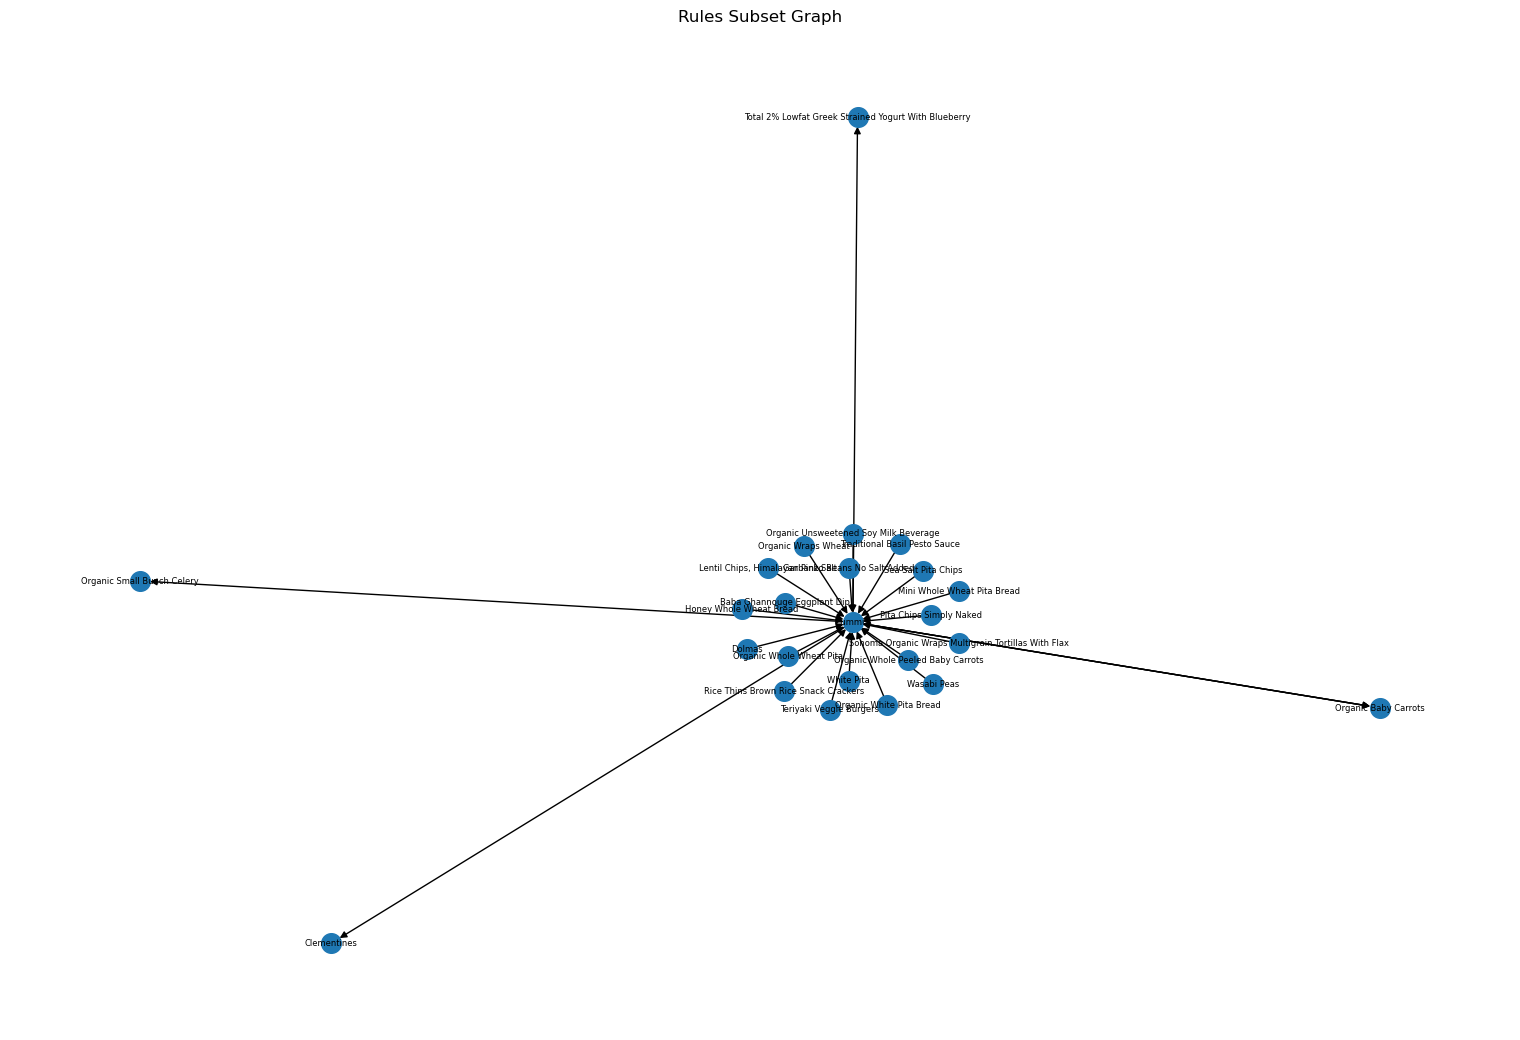

In [22]:
# Define graph_rules_subset, add the graph’s edges, and plot it. You may need a large figure size, smaller node size, and smaller font size.

graph_rules_subset = nx.MultiDiGraph()
edges = [(row['antecedent_item'], row['consequent_item']) for _, row in df_rules_subset.iterrows()]

graph_rules_subset.add_edges_from(edges)
plt.figure(figsize=(15, 10))  # large figure size
pos = nx.spring_layout(graph_rules_subset) # position for nodes
# Then render the graph.
nx.draw(graph_rules_subset, pos, with_labels=True, node_size=200, font_size=6, arrows=True)
plt.title("Rules Subset Graph")
plt.show()

What can you tell about people who buy hummus?

I can tell that there's certain foods they're relatively likely to get in addition to the hummus, and vice versa, with some of those
less likely foods being clementines and baby carrots. Some of the more likely addittions are common food for dipping into hummus like pita chips
 and other dips like eggplant dip.

## Make a Prediction

Given that the basket of items contains the following items, use the full set of association rules to predict the next 20 most likely items (consequents) that the person will add to the basket in descending order of lift:

* `'Orange Bell Pepper'`
* `'Organic Red Bell Pepper'`

Hint: a single item in the basket may be a better predictor of some consequents than both items considered together. You must consider both or either, but not neither.

In [24]:
basket = {'Orange Bell Pepper', 'Organic Red Bell Pepper'}

df_rules[df_rules['antecedent_items'].apply(lambda x: any(item in x for item in basket))] \
        .sort_values('lift', ascending=False) \
        .head(20)

,consequent_item,transaction_count,item_set_count,antecedent_count,consequent_count,antecedent_items,support,lift,confidence
342462,Icelandic Style Skyr Blueberry Non-fat Yogurt,3346083,100,209,19962,"[Nonfat Icelandic Style Strawberry Yogurt, Ora...",0.000030,80.202217,80.202217
345882,Icelandic Style Skyr Blueberry Non-fat Yogurt,3346083,132,311,19962,"[Non Fat Raspberry Yogurt, Orange Bell Pepper]",0.000039,71.145298,71.145298
346832,Nonfat Icelandic Style Strawberry Yogurt,3346083,100,441,11025,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,0.000030,68.820769,68.820769
346901,Non Fat Raspberry Yogurt,3346083,184,529,16953,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,0.000055,68.651858,68.651858
349532,Icelandic Style Skyr Blueberry Non-fat Yogurt,3346083,184,494,19962,"[Non Fat Raspberry Yogurt, Organic Red Bell Pe...",0.000055,62.434341,62.434341
350852,Icelandic Style Skyr Blueberry Non-fat Yogurt,3346083,167,471,19962,"[Organic Red Bell Pepper, Vanilla Skyr Nonfat ...",0.000050,59.433078,59.433078
350991,Non Fat Raspberry Yogurt,3346083,132,441,16953,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,0.000039,59.077960,59.077960
351360,Icelandic Style Skyr Blueberry Non-fat Yogurt,3346083,101,291,19962,"[Nonfat Icelandic Style Strawberry Yogurt, Org...",0.000030,58.178302,58.178302
351433,Nonfat Icelandic Style Strawberry Yogurt,3346083,101,529,11025,[Icelandic Style Skyr Blueberry Non-fat Yogurt...,0.000030,57.946047,57.946047
351881,Icelandic Style Skyr Blueberry Non-fat Yogurt,3346083,133,392,19962,"[Orange Bell Pepper, Vanilla Skyr Nonfat Yogurt]",0.000040,56.871965,56.871965


## Bonus: Other Interesting Findings

Find and share something else interesting about these association rules. It can be a graph, table, or some other format that illustrates your point.